Chosen Question： 
Which kinds of players are most likely to contribute a large amount of data to the game platform?

In [1]:
library(repr)
library(tidyverse)
options(repr.matrix.max.rows = 6) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_data  <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data  

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Loading the two datasets required for the analysis.

In [3]:
players_data |> summarise(
  n_values = n(),
  unique_names = n_distinct(name),
  missing_names = sum(is.na(name))
)

n_values,unique_names,missing_names
<int>,<int>,<int>
196,196,0


In [4]:
players_data |>
  summarise(
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    missing_age = sum(is.na(Age))
  )

min_age,max_age,mean_age,missing_age
<dbl>,<dbl>,<dbl>,<int>
9,58,21.14,2


In [5]:
players_data |> count(gender, sort = TRUE)

gender,n
<chr>,<int>
Male,124
Female,37
Non-binary,15
⋮,⋮
Two-Spirited,6
Agender,2
Other,1


In [6]:
players_data |> count(experience, sort = TRUE)

experience,n
<chr>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


In [7]:
players_data |> count(subscribe)

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


In [8]:
players_data |>
  summarise(
    min_hours = min(played_hours),
    max_hours = max(played_hours),
    mean_hours = round(mean(played_hours), 2),
    median_hours = median(played_hours)
  )


min_hours,max_hours,mean_hours,median_hours
<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.85,0.1


In [9]:
players_data |> summarise(
  total_rows = n(),
  unique_email = n_distinct(hashedEmail),
  missing_email = sum(is.na(hashedEmail))
)


total_rows,unique_email,missing_email
<int>,<int>,<int>
196,196,0


In [10]:
glimpse(players_data)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


`players_data` comprises 196 players and seven variables describing demographic characteristics, subscription status, and gaming activity. Ages range from 9 to 58 years old, with most players identifying as male and self-categorizing as “casual gamers.” Approximately 73% are subscribers. Total gaming hours exhibit a highly right-skewed distribution, with most players logging minimal time while a small minority contributed over 200 hours. Overall, the dataset quality is good, with only minor issues: two missing age values and some imbalanced frequency distributions in categorical variables.

In [11]:
names(players_data)

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

`name`: Unique identifier for each player; 196 distinct values in total; No missing values; used for merging with session data.

`age`: Numeric variable, ranging from 9 to 58 years old (mean ≈ 21.14); Two missing values present; concentrated among younger players.

`gender`: Categorical variable recording seven categories; “Male” is the largest group (124 individuals); no missing values.

`experience`: Categorical variable with five levels representing gaming experience; “Amateur” is the largest group (63 individuals); self-reported.

`subscribe`: Boolean variable indicating membership status; Approximately 73% of players are subscribers (144 True, 52 False).

`played_hours`: Numeric variable recording total gameplay hours; data is heavily right-skewed; Range: 0.00 to 223.10 hours, with most players having extremely short playtimes.

`hashedEmail`：Anonymized email identifier; contains 196 unique values; Serves only to verify data uniqueness; holds no substantive analytical value.

In [12]:
sessions_data |>
  summarise(
    total_sessions = n(),
    unique_users   = n_distinct(hashedEmail),
    missing_email  = sum(is.na(hashedEmail))
  )


total_sessions,unique_users,missing_email
<int>,<int>,<int>
1535,125,0


In [13]:
sessions_data |>
  summarise(
    total_rows      = n(),
    missing_start   = sum(is.na(start_time)),
    unique_start_ts = n_distinct(start_time)
  )


total_rows,missing_start,unique_start_ts
<int>,<int>,<int>
1535,0,1504


In [14]:
sessions_data |>
  summarise(
    total_rows    = n(),
    missing_end   = sum(is.na(end_time)),
    valid_end     = n() - sum(is.na(end_time))
  )


total_rows,missing_end,valid_end
<int>,<int>,<int>
1535,2,1533


In [15]:
sessions_data |>
  summarise(
    min_original_start = min(original_start_time, na.rm = TRUE),
    max_original_start = max(original_start_time, na.rm = TRUE),
    missing_original_start = sum(is.na(original_start_time))
  )


min_original_start,max_original_start,missing_original_start
<dbl>,<dbl>,<int>
1.7124e+12,1.72733e+12,0


In [16]:
sessions_data |>
  summarise(
    missing_original_end = sum(is.na(original_end_time)),
    valid_original_end   = n() - sum(is.na(original_end_time))
  )


missing_original_end,valid_original_end
<int>,<int>
2,1533


In [17]:
glimpse(sessions_data)

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


`sessions_data` contains 1,535 game records, with variables tracking session duration and user identity. Each record includes a hashed email identifier, start and end timestamps, and corresponding raw timestamp fields. Most players have multiple session records, but a small number of players contributed the vast majority of records. Timestamp field integrity is exceptionally high, with only two missing end-time values. Although the dataset structure is clear and well-defined, the number of sessions per player varies significantly. This necessitates linking session data to the player dataset using the hashed email identifier.

In [18]:
names(sessions_data)

[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

`hashedEmail`: Anonymized identifier linking sessions to players; 125 unique users across 1,535 sessions; no missing values; Used to merge with player_data.

`start_time`: String timestamp indicating when a session began; 1,535 non-missing entries; many unique values; Requires conversion to proper datetime format.

`end_time`: String timestamp marking when a session ended; 1,533 valid entries (2 missing); Duration must be computed from start/end times if needed.

`original_start_time`: Numeric UNIX-style timestamp representing the true start time; Complete (1,535 entries); clean and consistent; More reliable than string timestamps.

`original_end_time`: Numeric UNIX-style timestamp for session end time; 1,533 valid entries (matches missing in end_time).

Method:
We combined `player_data` with `session_data` to calculate each player's `duration_hours`. Since the total duration data exhibited a significantly right-skewed distribution, we used the median total duration as the cutoff point to define high contributors. For each demographic or experience group, we calculated the following metrics: 1.Number of players 2.Mean and median total duration 3.Percentage of high contributors. This allows for fair group comparisons even when sample sizes differ.

In [19]:
sessions_clean <- sessions_data |>
  mutate(
      
    start_dt = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M", tz = "UTC"),
    end_dt   = as.POSIXct(end_time,   format = "%d/%m/%Y %H:%M", tz = "UTC"),
      
    duration_hours = as.numeric(difftime(end_dt, start_dt, units = "hours"))
  ) |>
  arrange(desc(duration_hours))

head(sessions_clean)

hashedEmail,start_time,end_time,original_start_time,original_end_time,start_dt,end_dt,duration_hours
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,27/06/2024 22:21,28/06/2024 02:40,1.71953e+12,1.71954e+12,2024-06-27 22:21:00,2024-06-28 02:40:00,4.316667
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,06/08/2024 23:48,07/08/2024 04:04,1.72299e+12,1.72300e+12,2024-08-06 23:48:00,2024-08-07 04:04:00,4.266667
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,17/07/2024 00:51,17/07/2024 05:07,1.72118e+12,1.72119e+12,2024-07-17 00:51:00,2024-07-17 05:07:00,4.266667
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,29/08/2024 01:17,29/08/2024 05:32,1.72489e+12,1.72491e+12,2024-08-29 01:17:00,2024-08-29 05:32:00,4.250000
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,03/08/2024 21:36,04/08/2024 01:51,1.72272e+12,1.72274e+12,2024-08-03 21:36:00,2024-08-04 01:51:00,4.250000
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,24/07/2024 01:43,24/07/2024 05:58,1.72179e+12,1.72180e+12,2024-07-24 01:43:00,2024-07-24 05:58:00,4.250000


The purpose of this code is to convert `start_time` and `end_time` into actual time formats and calculate the duration (in hours) for each session.
This allows us to determine how long players actually played during each game session, preparing for subsequent calculations of total playtime and identification of high-contribution players.

In [20]:
sessions_clean |>
  summarise(
    min_duration  = min(duration_hours, na.rm = TRUE),
    max_duration  = max(duration_hours, na.rm = TRUE),
    mean_duration = mean(duration_hours, na.rm = TRUE)
  )

min_duration,max_duration,mean_duration
<dbl>,<dbl>,<dbl>
0.05,4.316667,0.8476408


Check the approximate range for each `duration_hours`, including the shortest, longest, and average durations.

In [21]:
player_sessions <- sessions_clean |>
  group_by(hashedEmail) |>
  summarise(
    n_sessions  = n(),
    total_hours = sum(duration_hours, na.rm = TRUE),
    .groups = "drop"
  ) |>
  arrange(desc(total_hours))

head(player_sessions)

hashedEmail,n_sessions,total_hours
<chr>,<int>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,244.51667
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,95,235.53333
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,147,197.11667
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,165.78333
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,79.91667
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,130,64.55000


This code groups the cleaned session data by hashedEmail and calculates the following metrics for each player:

`n_sessions`: Total number of games played

`total_hours`: Cumulative duration across all sessions

In [22]:
player_level <- players_data |>
  left_join(player_sessions, by = "hashedEmail") |>
  mutate(
    n_sessions  = replace_na(n_sessions, 0),
    total_hours = replace_na(total_hours, 0)
  )|>
  arrange(desc(total_hours))

head(player_level)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,n_sessions,total_hours
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219,244.51667
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95,235.53333
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147,197.11667
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159,165.78333
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310,79.91667
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130,64.55000


This code merges `players_data` with each player's `player_sessions` using `hashedEmail` to form the final player-level dataframe player_level.
After merging, if a player has no session records, missing values for `n_sessions` and `total_hours` are imputed as 0.
Finally, the data is sorted in descending order by total hours played. This allows us to identify players who possess both player attributes and complete behavioral statistics, preparing us to analyze which player types are most likely to be high contributors.

In [23]:
player_level <- player_level |>
  mutate(
    high_contributor = total_hours >= 1
  )

head(player_level)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,n_sessions,total_hours,high_contributor
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219,244.51667,TRUE
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95,235.53333,TRUE
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147,197.11667,TRUE
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159,165.78333,TRUE
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310,79.91667,TRUE
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130,64.55000,TRUE


A new Boolean variable `high_contributor` is added for each player to determine whether they qualify as a “high contributor”.
The criterion used is: if the player's total gameplay duration `total_hours` is greater than or equal to 1 hour, it is marked as TRUE; otherwise, it is FALSE.

In [24]:
player_level |>
  summarise(
    n_players = n(),
    n_high    = sum(high_contributor),
    prop_high = mean(high_contributor)
  )

n_players,n_high,prop_high
<int>,<int>,<dbl>
196,43,0.2193878


`n_players` represents the total number of players, `n_high` denotes the number of players meeting the high contribution criteria,
and `prop_high` indicates the proportion of high-contribution players。

In [25]:
experience_summary <- player_level |>
  group_by(experience) |>
  summarise(
    n_players          = n(),
    mean_total_hours   = mean(total_hours),
    median_total_hours = median(total_hours),
    prop_high          = mean(high_contributor),
    .groups = "drop"
  ) |>
  arrange(desc(prop_high))

experience_summary

experience,n_players,mean_total_hours,median_total_hours,prop_high
<chr>,<int>,<dbl>,<dbl>,<dbl>
Pro,14,2.9059524,0.4083333,0.2857143
Beginner,35,1.4919048,0.1833333,0.2571429
Amateur,63,7.1547619,0.1500000,0.2222222
Regular,36,19.9870370,0.1500000,0.2222222
Veteran,48,0.7552083,0.1500000,0.1666667


The code segment groups players by their experience level and calculates the following metrics for each group:

`n_players`: Number of players at this experience level

`mean_total_hours`: Average total playtime

`median_total_hours`: Median playtime (reduces the impact of outliers)

`prop_high`: Proportion of high-contribution players

Finally, it sorts the groups by descending order of the high-contribution proportion.

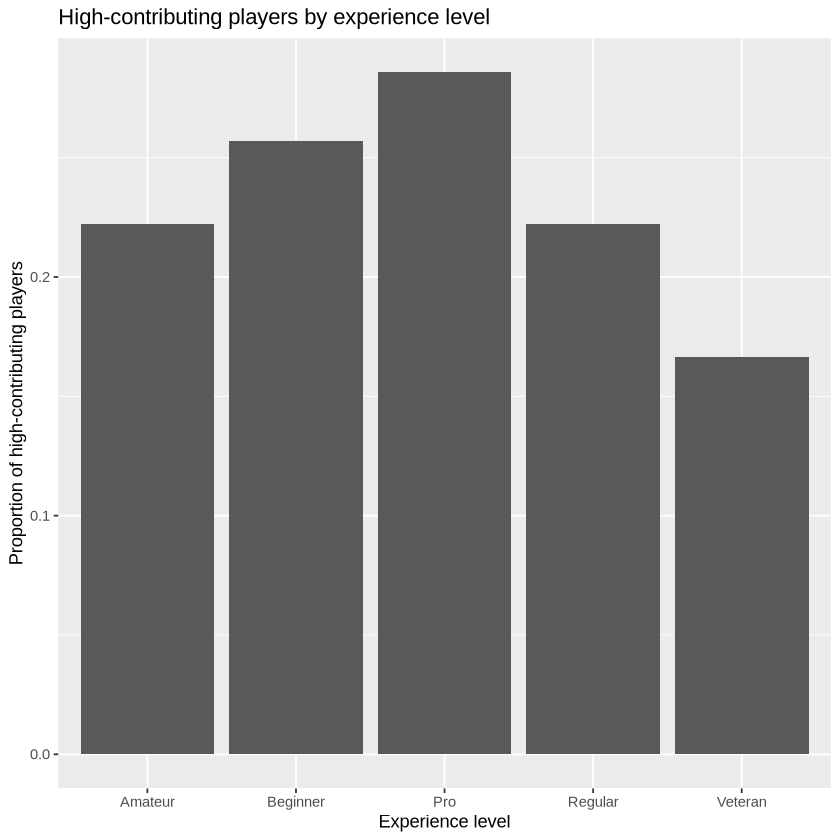

In [26]:
experience_summary |>
  ggplot(aes(x = experience, y = prop_high)) +
  geom_col() +
  labs(
    x = "Experience level",
    y = "Proportion of high-contributing players",
    title = "High-contributing players by experience level"
  )


Experience:

Pro players have the highest proportion of high contributors (about 29%), while Regular players have the highest average total hours overall. Veteran players contribute surprisingly little on average. This suggests that both skill and investment might matter, but being Veteran does not necessarily mean more playtime in this dataset.


In [27]:
subscribe_summary <- player_level |>
  group_by(subscribe) |>
  summarise(
    n_players          = n(),
    mean_total_hours   = mean(total_hours),
    median_total_hours = median(total_hours),
    prop_high          = mean(high_contributor),
    .groups = "drop"
  )

subscribe_summary

subscribe,n_players,mean_total_hours,median_total_hours,prop_high
<lgl>,<int>,<dbl>,<dbl>,<dbl>
FALSE,52,0.6419872,0.09166667,0.1730769
TRUE,144,8.7920139,0.18333333,0.2361111


The code groups data based on whether players are subscribed, calculating the number of players in each group, the average total duration, the median duration, and the proportion of high-contribution players.

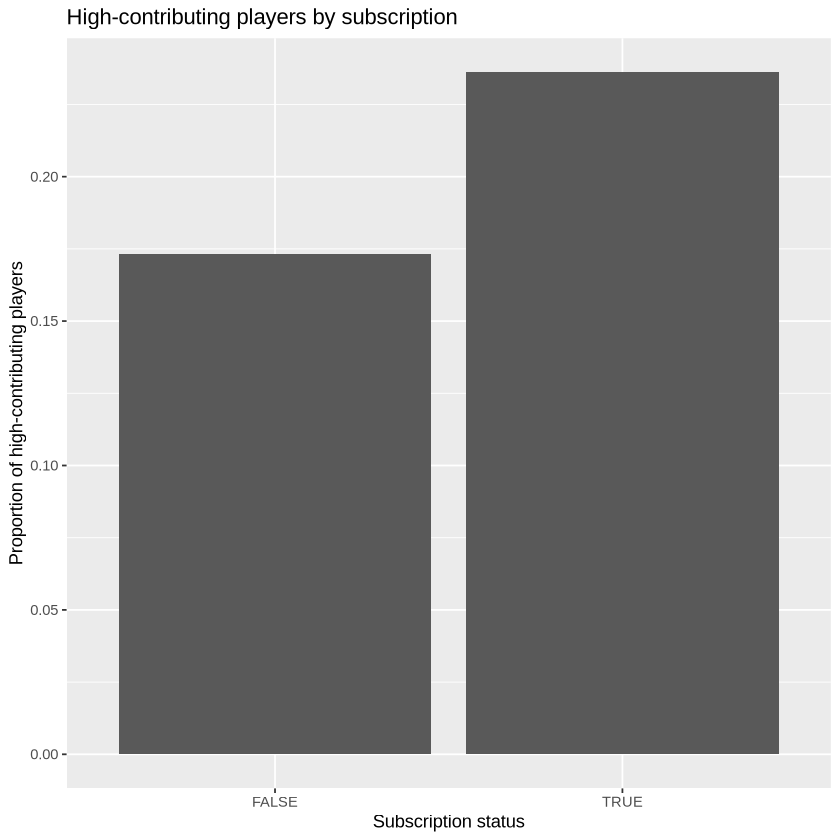

In [28]:
subscribe_summary |>
  ggplot(aes(x = subscribe, y = prop_high)) +
  geom_col() +
  labs(
    x = "Subscription status",
    y = "Proportion of high-contributing players",
    title = "High-contributing players by subscription"
  )

Subscribe: 

Subscribers demonstrated particularly strong performance. Over 23% of them were high contributors, compared to just 17% among non-subscribers, and subscribers also showed significantly higher average usage time. This pattern emerged as one of the most pronounced and consistent across all variables.


In [29]:
gender_summary <- player_level |>
  group_by(gender) |>
  summarise(
    n_players          = n(),
    mean_total_hours   = mean(total_hours),
    median_total_hours = median(total_hours),
    prop_high          = mean(high_contributor),
    .groups = "drop"
  )|>
  arrange(desc(prop_high))

head(gender_summary)

gender,n_players,mean_total_hours,median_total_hours,prop_high
<chr>,<int>,<dbl>,<dbl>,<dbl>
Agender,2,6.8416667,6.84166667,0.5000000
Non-binary,15,16.0955556,0.00000000,0.2666667
Female,37,11.8072072,0.20000000,0.2432432
Male,124,4.8423387,0.16666667,0.2177419
Prefer not to say,11,0.5363636,0.08333333,0.1818182
Other,1,0.2500000,0.25000000,0.0000000


This code segment groups players by `gender` and calculates the number of players, average total duration, median duration, and proportion of high-contribution players for each group.
It then sorts the groups by high-contribution proportion from highest to lowest.

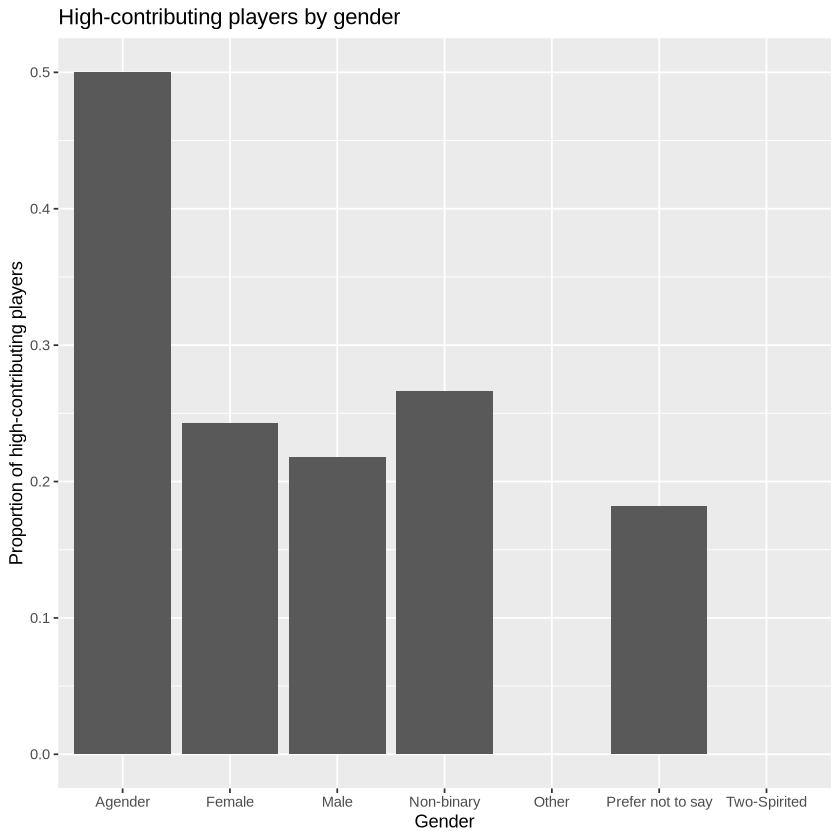

In [30]:
gender_summary |>
  ggplot(aes(x = gender, y = prop_high)) +
  geom_col() +
  labs(
    x = "Gender",
    y = "Proportion of high-contributing players",
    title = "High-contributing players by gender"
  )

Gender: 

The proportion of high contributors among non-binary and female players is slightly higher than that among males. The proportion is highest among non-binary individuals, but the sample size is extremely small, making the data unstable. Overall, gender differences do exist, but their impact is weaker than that of subscription status or gaming experience.


In [31]:
player_level_age <- player_level |>
  mutate(
    age_group = cut(
      Age,
      breaks = c(0, 18, 25, 35, 50, Inf),
      labels = c("<=18", "19-25", "26-35", "36-50", "50+"),
      right = TRUE
    )
  )

In [32]:
age_summary <- player_level_age |>
  group_by(age_group) |>
  summarise(
    n_players = n(),
    mean_total_hours = mean(total_hours),
    median_total_hours = median(total_hours),
    prop_high = mean(high_contributor),
    .groups = "drop"
  ) 
  
age_summary

age_group,n_players,mean_total_hours,median_total_hours,prop_high
<fct>,<int>,<dbl>,<dbl>,<dbl>
<=18,91,6.9780220,0.1500000,0.2307692
19-25,80,7.7495833,0.1583333,0.2125000
26-35,12,1.8125000,0.4916667,0.3333333
36-50,9,2.4259259,0.1833333,0.1111111
50+,2,0.2500000,0.2500000,0.0000000
NA,2,0.1916667,0.1916667,0.0000000


The code divides players into five age groups based on their age and creates a new categorical variable, `age_group`.
This facilitates easier comparison of players across different age groups in subsequent analyses. Players are then grouped by age category to calculate the number of players in each group, the average total playtime, the median total playtime, and the proportion of high-contribution players.

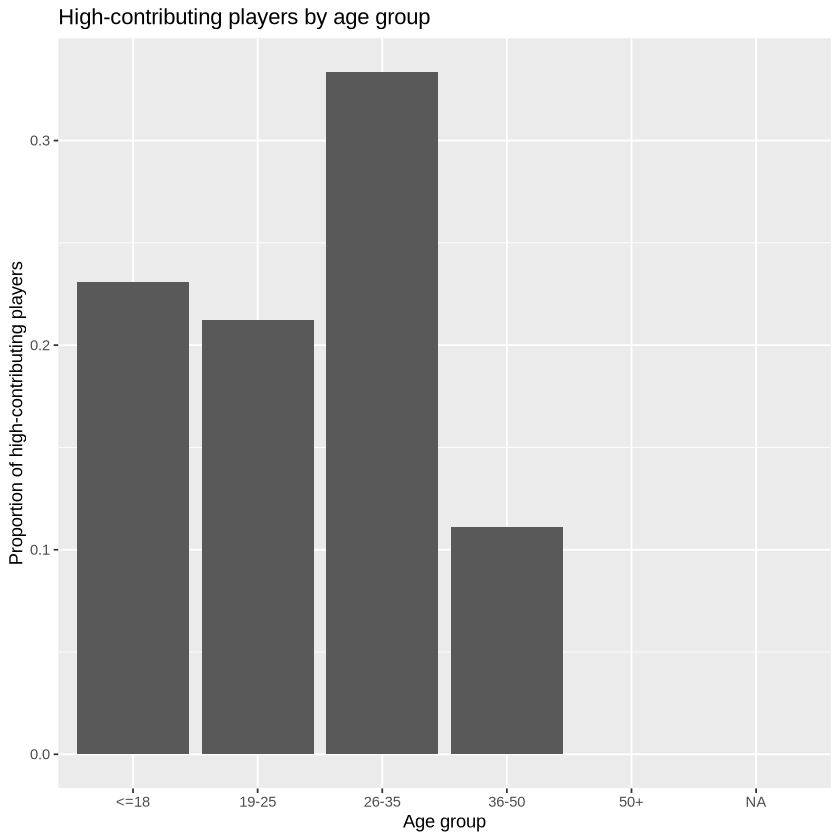

In [33]:
age_summary |>
  ggplot(aes(x = age_group, y = prop_high)) +
  geom_col() +
  labs(
    x = "Age group",
    y = "Proportion of high-contributing players",
    title = "High-contributing players by age group"
  )

Age Group: 

The highest proportion of high contributors was found in the 26-35 age group (33%), though this group also had a relatively small sample size. The two largest age groups (≤18 and 19-25) both had high contributor proportions ranging between 21% and 23%. Therefore, in terms of numbers, younger players typically form the bulk of the high contributor group.


In [34]:
combo_summary <- player_level_age |>
  group_by(age_group, experience, gender, subscribe) |>
  summarise(
    n_players        = n(),
    prop_high        = mean(high_contributor),
    mean_total_hours = mean(total_hours),
    .groups = "drop"
  ) |>
 
  filter(n_players >= 5) |>
  arrange(desc(prop_high), desc(mean_total_hours))

head(combo_summary)

age_group,experience,gender,subscribe,n_players,prop_high,mean_total_hours
<fct>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>
<=18,Pro,Male,TRUE,7,0.4285714,5.3000000
<=18,Amateur,Female,TRUE,6,0.3333333,36.6277778
<=18,Regular,Male,TRUE,9,0.3333333,28.5000000
19-25,Beginner,Male,TRUE,6,0.3333333,4.6222222
<=18,Beginner,Female,TRUE,6,0.3333333,0.3777778
<=18,Amateur,Male,TRUE,13,0.3076923,6.9910256


This code segment groups and analyzes four player characteristics: `age_group`, `experience`, `gender`, and `subscribe`.
For each characteristic combination, the code calculates the number of players, `prop_high`, and the average total duration.
It then filters out groups with fewer than 5 players to avoid unstable statistical results and sorts them by high contribution ratio from highest to lowest.
Through this analysis, we can identify the player type combinations most likely to contribute substantial data.

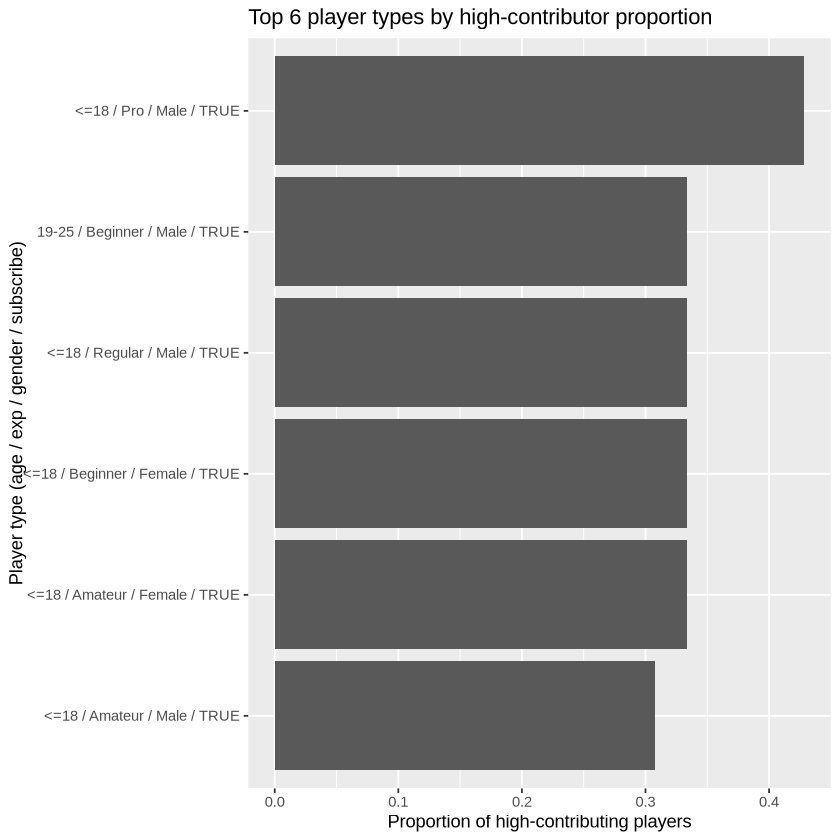

In [35]:
combo_summary |>
  slice_head(n = 6) |>
  mutate(
    combo_label = paste(age_group, experience, gender, subscribe, sep = " / ")
  ) |>
  ggplot(aes(x = reorder(combo_label, prop_high), y = prop_high)) +
  geom_col() +
  coord_flip() +
  labs(
    x = "Player type (age / exp / gender / subscribe)",
    y = "Proportion of high-contributing players",
    title = "Top 6 player types by high-contributor proportion"
  )


Combined Groups: 

From the perspective of feature combinations, one of the most prominent patterns emerges among young, highly experienced subscription players. For instance, Pro subscribers aged ≤18 account for the highest proportion (approximately 43%). The 19-25 age group exhibits similar characteristics.


Conclusion  

Among all variables, subscription status is the most reliable indicator for predicting high contribution levels. Experience level is equally important, particularly for professional players. Age is a secondary key factor: younger players form the core group of high contributors, though a significant proportion of high contributors also fall within the 26-35 age bracket.
Overall, the player demographic most likely to generate massive amounts of data is characterized by: being subscribed, highly experienced (Pro/Regular), and relatively young. If the goal is to maximize game data collection, these groups represent the optimal targets for future recruitment efforts.


GitHub

https://github.com/zgao36/DSCI-100-2025W1-Group-34.git